In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df.head()

,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,vehicle_choice
0,CusID_00000,36.0,Male,New York City,Divorced,2.0,160.0,32200.0,Service,Yes,Yes,Hybrid,Sedan
1,CusID_00001,15.0,Female,New York City,Single,1.0,143.0,9000.0,Service,Yes,Yes,Petrol,Compact Utility Vehicle
2,CusID_00002,55.0,Male,Paris,Married,2.0,168.0,152400.0,Service,Yes,No,Petrol,Sports Sedan
3,CusID_00003,23.0,Male,Vancouver,Divorced,3.0,165.0,141140.0,Business,Yes,No,Diesel,Sportscar
4,CusID_00004,23.0,Not_Specified,Vancouver,Single,1.0,147.0,38100.0,Service,Yes,Yes,Hybrid,Sports Utility Vehicle


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              30000 non-null  object 
 1   Age                     29561 non-null  float64
 2   Gender                  29583 non-null  object 
 3   City                    29577 non-null  object 
 4   is_Married              29580 non-null  object 
 5   family_size             29586 non-null  float64
 6   height                  29569 non-null  float64
 7   annual_income           29581 non-null  float64
 8   job                     29572 non-null  object 
 9   is_physically_ok        29578 non-null  object 
 10  has_taken_car_loan      29569 non-null  object 
 11  preferable_fuel_choice  29572 non-null  object 
 12  vehicle_choice          30000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 3.0+ MB


## Handling Null Values

In [4]:
df.isna().sum()

CustomerID                  0
Age                       439
Gender                    417
City                      423
is_Married                420
family_size               414
height                    431
annual_income             419
job                       428
is_physically_ok          422
has_taken_car_loan        431
preferable_fuel_choice    428
vehicle_choice              0
dtype: int64

In [9]:
df.drop(columns="CustomerID",inplace=True)

In [13]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["City"].fillna(df["City"].mode()[0],inplace=True)
df["is_Married"].fillna(df["is_Married"].mode()[0],inplace=True)
df["family_size"].fillna(df["family_size"].mean(),inplace=True)
df["height"].fillna(df["height"].mean(),inplace=True)
df["annual_income"].fillna(df["annual_income"].mean(),inplace=True)
df["job"].fillna(df["job"].mode()[0],inplace=True)
df["is_physically_ok"].fillna(df["is_physically_ok"].mode()[0],inplace=True)
df["has_taken_car_loan"].fillna(df["has_taken_car_loan"].mode()[0],inplace=True)
df["preferable_fuel_choice"].fillna(df["preferable_fuel_choice"].mode()[0],inplace=True)

In [14]:
df.isna().sum()

Age                       0
Gender                    0
City                      0
is_Married                0
family_size               0
height                    0
annual_income             0
job                       0
is_physically_ok          0
has_taken_car_loan        0
preferable_fuel_choice    0
vehicle_choice            0
dtype: int64

In [15]:
df['vehicle_choice'].nunique()

18

## Handling outlier

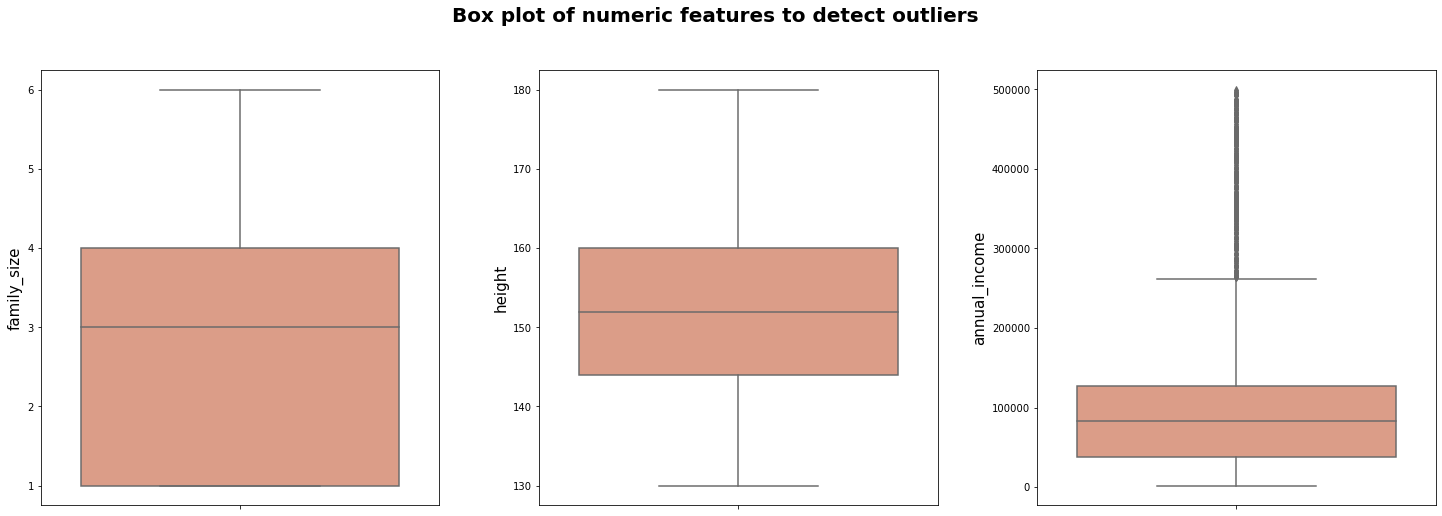

In [35]:
col_num=df.select_dtypes(include=["int64","float64"]).columns.tolist()
fig,axs=plt.subplots(1,3,figsize=(25,8))
fig.suptitle("Box plot of numeric features to detect outliers",y=0.99,fontweight="bold",fontsize=20)
for col,ax in zip(col_num[1:],axs.flatten()):
    b=sns.boxplot(y=df[col],ax=ax,color="darksalmon")
    b.set_ylabel(col,fontsize=15)
    plt.subplots_adjust(wspace=.25)


In [38]:
Q1=np.percentile(df['annual_income'],25,interpolation='midpoint')
Q2=np.percentile(df['annual_income'],50,interpolation='midpoint')
Q3=np.percentile(df['annual_income'],75,interpolation='midpoint')

IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [39]:
print('The values of annual income below',low_lim,'and the values  of annual income above',up_lim,'are outliers.')

The values of Age below -97585.0 and the values  of Age above 262615.0 are outliers.


In [40]:
outlier=[]
for x in df['annual_income']:
    if x > up_lim or x < low_lim:
        outlier.append(x)
        
print('There are',len(outlier),'outliers in annual income column.','\n')
print('Outliers are:',outlier)

There are 263 outliers in annual income column. 

Outliers are: [303500.0, 286600.0, 412400.0, 339900.0, 390600.0, 350200.0, 294000.0, 305300.0, 432600.0, 464500.0, 362400.0, 375600.0, 381700.0, 356400.0, 301600.0, 492900.0, 277200.0, 433600.0, 431200.0, 320400.0, 405000.0, 326200.0, 334600.0, 300900.0, 485300.0, 266000.0, 370900.0, 460200.0, 441100.0, 370700.0, 481500.0, 396600.0, 343700.0, 351900.0, 488000.0, 360400.0, 375100.0, 387600.0, 283700.0, 469400.0, 414400.0, 438100.0, 369400.0, 429800.0, 411000.0, 287800.0, 303300.0, 327200.0, 344400.0, 327800.0, 325300.0, 482300.0, 347500.0, 365400.0, 420600.0, 425300.0, 365600.0, 472100.0, 474300.0, 482900.0, 356800.0, 383500.0, 496600.0, 323200.0, 429700.0, 347800.0, 479900.0, 301100.0, 481200.0, 480200.0, 408400.0, 336200.0, 451900.0, 413800.0, 462500.0, 306500.0, 492900.0, 356400.0, 330400.0, 378800.0, 467900.0, 453000.0, 344600.0, 368300.0, 311700.0, 442100.0, 337100.0, 342500.0, 304700.0, 378900.0, 326100.0, 485000.0, 268600.0, 27820

In [43]:
ind1=df['annual_income'] > up_lim
i1=df.loc[ind1].index

print('The index values of the outliers which are above upper limit:',i1,'\n')


The index values of the outliers which are above upper limit: Int64Index([   54,    89,   149,   242,   384,   435,   489,   574,   611,
              763,
            ...
            28624, 28758, 28759, 28934, 29072, 29177, 29356, 29384, 29583,
            29618],
           dtype='int64', length=263) 



In [44]:
df.drop(i1,inplace=True)

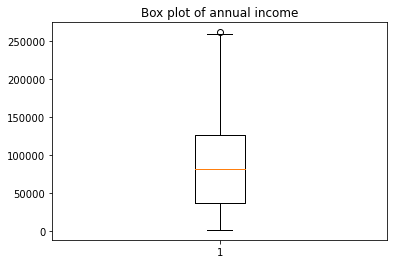

In [45]:
plt.boxplot(df['annual_income'])
plt.title('Box plot of annual income')
plt.show()

## Label encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Gender']=lb.fit_transform(df['Gender'])
df['City']=lb.fit_transform(df['City'])
df['is_Married']=lb.fit_transform(df['is_Married'])
df['is_physically_ok']=lb.fit_transform(df['is_physically_ok'])
df['job']=lb.fit_transform(df['job'])
df['has_taken_car_loan']=lb.fit_transform(df['has_taken_car_loan'])
df['preferable_fuel_choice']=lb.fit_transform(df['preferable_fuel_choice'])

## Modelling

In [48]:
x = df.drop("vehicle_choice",axis = 1)
y = pd.DataFrame(df["vehicle_choice"])

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [64]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
# to obtain optimum K value
# so we want to create model with varied k value
acc_values=[]
neighbors=np.arange(60,75)
for k in neighbors:
    classifier=KNN(n_neighbors=k,metric='minkowski') 
    classifier.fit(x_train,y_train) 
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred) 
    acc_values.append(acc) 

Text(0, 0.5, 'accuracy')

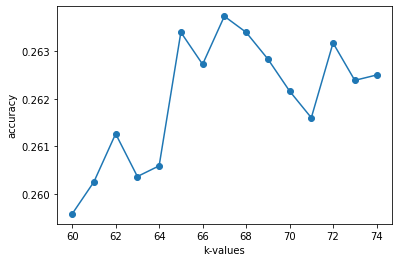

In [65]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-values')
plt.ylabel('accuracy')

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
SEED=42
lr=LogisticRegression(random_state=SEED)
knn=KNN(n_neighbors=67)
dtc=DecisionTreeClassifier(random_state=SEED)
svc = SVC(kernel='rbf')
classifiers=[('LogisticRegression',lr),('K Nearest Neighbors',knn),('Decision Tree',dtc),('SVM',svc)]

In [67]:
for class_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('{:s}:{:.3f}'.format(class_name,accuracy))

LogisticRegression:0.217
K Nearest Neighbors:0.264
Decision Tree:0.918
SVM:0.249


In [68]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
SEED = 42
vc=VotingClassifier(estimators=classifiers)
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
classifiers=[('Voting Classifier',vc),('Random Forest',rf),('Gradient Boosting',gb),('Extreme Gradient Boosting',xgb)]

In [69]:
for class_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('{:s}:{:.3f}'.format(class_name,accuracy))

Voting Classifier:0.370
Random Forest:0.947
Gradient Boosting:0.881
[16:50:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Extreme Gradient Boosting:0.945


## Hyper Parameter Tuning of Random Forest

In [107]:
param_grid = { 
    'n_estimators': [100,200,300],
    'max_depth' : [20,25,30],
    'criterion' :['gini', 'entropy']
}

In [108]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 300}

In [109]:
rft = RandomForestClassifier(n_estimators=300,max_depth=25,random_state=42,criterion="entropy")
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)
round(accuracy_score(y_test,y_pred),3)

0.948

## Model testing

In [84]:
test_file = pd.read_csv("test.csv")

In [71]:
df1 = pd.read_csv("test.csv")
df1.head()

,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice
0,CusID_30000,32.0,Female,Delhi,Married,6.0,142.0,150800.0,Service,Yes,No,Diesel
1,CusID_30001,22.0,Male,Perth,Divorced,4.0,155.0,167000.0,Service,Yes,No,Petrol
2,CusID_30002,46.0,Female,Barcelona,Married,2.0,NaN,66000.0,Service,Yes,No,Petrol
3,CusID_30003,35.0,NaN,Kuala Lampur,Single,1.0,137.0,71820.0,Business,Yes,NaN,Petrol
4,CusID_30004,48.0,Male,Sydney,Married,3.0,162.0,6500.0,Service,Yes,Yes,Hybrid


In [73]:
df1.drop(columns="CustomerID",inplace=True)

In [76]:
df1["Age"].fillna(df1["Age"].mean(),inplace=True)
df1["Gender"].fillna(df1["Gender"].mode()[0],inplace=True)
df1["City"].fillna(df1["City"].mode()[0],inplace=True)
df1["is_Married"].fillna(df1["is_Married"].mode()[0],inplace=True)
df1["family_size"].fillna(df1["family_size"].mean(),inplace=True)
df1["height"].fillna(df1["height"].mean(),inplace=True)
df1["annual_income"].fillna(df1["annual_income"].mean(),inplace=True)
df1["job"].fillna(df1["job"].mode()[0],inplace=True)
df1["is_physically_ok"].fillna(df1["is_physically_ok"].mode()[0],inplace=True)
df1["has_taken_car_loan"].fillna(df1["has_taken_car_loan"].mode()[0],inplace=True)
df1["preferable_fuel_choice"].fillna(df1["preferable_fuel_choice"].mode()[0],inplace=True)

In [79]:
df1['Gender']=lb.fit_transform(df1['Gender'])
df1['City']=lb.fit_transform(df1['City'])
df1['is_Married']=lb.fit_transform(df1['is_Married'])
df1['is_physically_ok']=lb.fit_transform(df1['is_physically_ok'])
df1['job']=lb.fit_transform(df1['job'])
df1['has_taken_car_loan']=lb.fit_transform(df1['has_taken_car_loan'])
df1['preferable_fuel_choice']=lb.fit_transform(df1['preferable_fuel_choice'])

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300,max_depth=25,random_state=42,criterion="entropy")
rf.fit(x,y)
y_pred=rf.predict(df1)
print(y_pred)

['Sports Utility Vehicle' 'Sports Utility Vehicle' 'Sedan' ...
 'Pickup-Truck' 'Sports Utility Vehicle' 'Crossover']


In [111]:
test_file["vehicle_choice"] = y_pred

In [112]:
sub_file = test_file[["CustomerID","vehicle_choice"]]
sub_file.head()

,CustomerID,vehicle_choice
0,CusID_30000,Sports Utility Vehicle
1,CusID_30001,Sports Utility Vehicle
2,CusID_30002,Sedan
3,CusID_30003,Sportscar
4,CusID_30004,Crossover


In [113]:
sub_file.to_csv(r'C:\Users\ab\Downloads\Submission.csv',index = False)